## 투빅스 10기 4주차 교육 차원축소-PCA

#### 2018-08-08 Tobigs Week 04 Class 

In [2]:
# pip install watermark
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.6.5
IPython 6.4.0

numpy 1.14.3
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.0
matplotlib 2.2.2


# wine 데이터를 PCA로!

In [3]:
## 라이브러리 설정 및 데이터 확인 

import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
### 데이터 전처리 - 데이터셋 분리
from sklearn.cross_validation import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
        
        
### 데이터 전처리 - 데이터 표준화 작업
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\ewon\Anaconda3\envs\ml_practice\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
### 공분산 행렬을 이용한 Eigendecomposition
import numpy as np

cov_mat = np.cov(X_train_std.T) # 공분산 행렬을 생성해주는 함수
# T는 Matrix의 T를 의미. 함수에 맞는 파라미터로 쓰기 위해 행렬을 돌려줌

# 고유벡터 값 뽑아내기
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


In [5]:
### 에이겐벨류의 설명 분산 비율
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# 에이겐벨류 / 에이겐벨류의 합 을 각각 구한다. 나온 각각의 값은 아이겐벨류의 설명 분산 비율이다.
# 즉, 어떤 에이겐벨류가 가장 설명력이 높은지를 비율로 나타내기 위한 것이다.

cum_var_exp = np.cumsum(var_exp) # 누적 합을 계산해주는 함수. -> 누적 백분위로 표현

In [6]:
### 에이겐벨류의 영향력을 그래프로 시각화
import matplotlib.pyplot as plt
%matplotlib inline

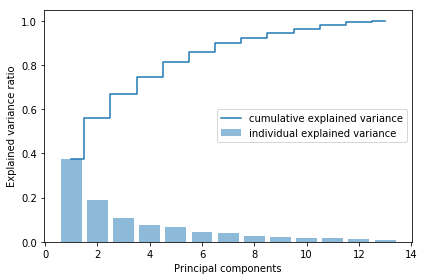

In [7]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [9]:
### 에이겐 쌍을 이용하여 투영행렬 생성
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# 에이겐 쌍 생성 -> 투플 자료형

eigen_pairs.sort(reverse=True) # 내림차순으로 정렬

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
# 투영행렬 W : 변수를 2차원으로 축소시키는 투영행렬.
# eigen_pairs의 0,1 번째만 -> 2개의 에이겐 쌍으로만 차원축소를 하겠다는 것.
# hstack -> 행의 수가 같은 두 개 이상의 배열을 옆으로 연결하여, 열의 수가 늘어난 np배열을 만든다.
# 1차원 배열끼리는 hstack 되지 않으므로 [:, np.newaxis]을 추가함.

print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [39]:
### 투영행렬로 피처 압축
X_train_std[0].dot(w) # X_train_std[0] 행렬과 W 행렬의 곱(내적연산)

X_train_pca = X_train_std.dot(w) # 피처를 투영행렬에 곱한 값 -> 피처 축소된 결과

C:\Users\lady1\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


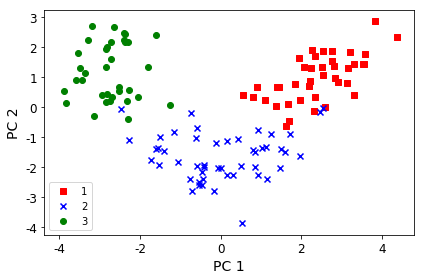

In [40]:
### 변환된 데이터를 그래프로 시각화
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

## 과제용 참고자료 

In [4]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 난수 초기화
np.random.seed(10)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 나눔바른고딕으로 글씨체 저장 
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. Random Data 형성
3D 데이터셋을 만듭니다:

In [6]:
np.random.seed(10)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print(X)

[[-0.95445059 -0.01086065 -0.1699832 ]
 [ 0.73465177 -0.29146034 -0.04005887]
 [-0.36813396  0.40479077  0.13946664]
 [-0.89140761  0.0859435  -0.00303781]
 [ 0.20035803  0.68670712  0.32673405]
 [ 1.09481108  0.2905039   0.16718968]
 [ 1.10591174  0.26528331  0.04808812]
 [-0.99460157 -0.02567148 -0.17505628]
 [ 1.15896887  0.26661108  0.24926869]
 [ 0.91980264  0.06473876  0.18579933]
 [-0.72023325  0.34941421  0.2553059 ]
 [-1.06159553 -0.50912371 -0.24717852]
 [ 0.70715167 -0.27298498  0.01328113]
 [ 0.06379665  0.66760012  0.18892982]
 [-1.09388932 -0.04784826 -0.16431636]
 [-0.39158442  0.51316362  0.19296816]
 [-0.83622881  0.15516704 -0.00172501]
 [ 1.04761983  0.48099738  0.22833325]
 [-1.10195686 -0.47395573 -0.36035214]
 [-0.77777477  0.20525801 -0.02850706]
 [-0.00912105  0.55769201  0.12729728]
 [ 1.19354573  0.10731078  0.27706518]
 [ 0.70698377  0.73331531  0.38540558]
 [-0.6387477   0.31524434 -0.07153254]
 [ 0.43641827  0.79922465  0.40012606]
 [ 0.48548711  0.77212975

# 2. 사이킷런을 사용한 PCA

사이킷런에서는 PCA가 아주 간단합니다. 데이터셋에서 평균을 빼는 작업도 대신 처리해 줍니다:

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #2차원으로 줄여줘! 
X2D = pca.fit_transform(X)

print(X2D)

[[ 1.02733589 -0.01300021]
 [-0.53462407  0.69577202]
 [ 0.31291551 -0.31106505]
 [ 0.91558408 -0.13073724]
 [-0.33090657 -0.457295  ]
 [-1.05845492  0.20932235]
 [-1.04325428  0.26950481]
 [ 1.07019299 -0.0096547 ]
 [-1.1270486   0.226366  ]
 [-0.83774155  0.35961121]
 [ 0.64382533 -0.39546867]
 [ 1.26750872  0.43323209]
 [-0.52174667  0.65573103]
 [-0.17332622 -0.44015373]
 [ 1.16873593 -0.02121565]
 [ 0.29928618 -0.43212283]
 [ 0.84531531 -0.1783776 ]
 [-1.07134464  0.00417179]
 [ 1.31564139  0.42163613]
 [ 0.78132251 -0.19958499]
 [-0.06605134 -0.34329769]
 [-1.12449381  0.37402827]
 [-0.83551453 -0.36981077]
 [ 0.6280489  -0.2475516 ]
 [-0.59639003 -0.51261795]
 [-0.60746314 -0.42319384]
 [ 0.25087622 -0.33240588]
 [-0.32127253 -0.36213108]
 [ 0.62798968 -0.31660183]
 [ 0.26786615 -0.37022854]
 [ 1.16723659  0.0461118 ]
 [-0.08024008 -0.47337372]
 [ 1.28311343  0.3629074 ]
 [-1.03495779 -0.11083904]
 [-0.83219567  0.51727896]
 [-0.95029544 -0.12500697]
 [-0.96396851  0.44552589]
 

# PCA

C:\Users\lady1\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


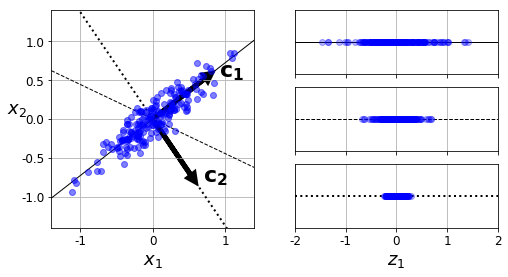

In [24]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

# MNIST Data 압축
현재(2018.08.08) MNIST를 다운받는 mldata.org 홈페이지가 다운됨. 아래 링크를 다운받고, 아래 있는 dataset 폴더에 저장하여 파일실행!
https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat

In [4]:
from sklearn import datasets 
datasets.get_data_home() 

'C:\\Users\\wjdgk\\scikit_learn_data'

In [9]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original') # 데이터 로딩

In [10]:
from sklearn.model_selection import train_test_split

X = mnist["data"] 
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [26]:
pca = PCA()
pca.fit(X_train) # PCA에 train data 적합 
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [27]:
d 

154

In [28]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [37]:
pca.n_components_ # 주성분 갯수

154

In [29]:
np.sum(pca.explained_variance_ratio_)

0.9503623084769206

In [30]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [40]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

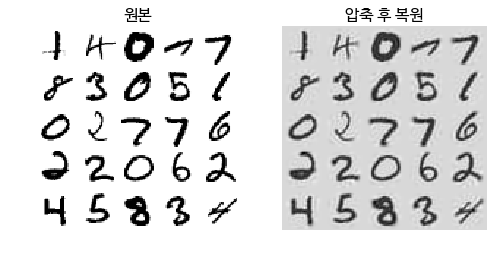

In [41]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("원본", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("압축 후 복원", fontsize=16)

In [42]:
X_reduced_pca = X_reduced

## 과제

- 1) MNIST 데이터를 로드하고 train - testset으로 분할하세요. (6:1 비율입니다) 
- 2) 이 데이터셋에 RF 분류기와 로지스틱회귀를 훈련시키고 얼마나 오래 걸리는 지 타임스탬프를 찍은 후 테스트 셋을 평가합니다. 
- 3) 그 다음 PCA로 설명된 분산이 96%가 되도록 차원을 축소하고, 
- 4) 축소된 데이터 셋으로 새로운 RF 분류기/소프트맥스 분류기를 훈련시켜 타임스탬프를 찍습니다. 
- 5) 훈련속도를 비교하는 table을 만들어주세요!


- 필요한 라이브러리: 
#### from sklearn.ensemble import RandomForestClassifier
#### from sklearn.linear_model import LogisticRegression
#### import time
#### from sklearn.metrics import accuracy_score
#### from sklearn.decomposition import PCA